In [1]:
install.packages("cowplot")

пакет 'cowplot' успешно распакован, MD5-суммы проверены

Скачанные бинарные пакеты находятся в
	C:\Users\Artem Smirnov\AppData\Local\Temp\RtmpiuAjpJ\downloaded_packages


In [2]:
library(ggplot2)
library(cowplot)
library(grid)

## 1. [Issue #1288](https://github.com/JetBrains/lets-plot/issues/1288) - Allow absolute width for `geom_errorbar` (and possibly others)

In [3]:
get_errorbar_data <- function (n, seed = 42) {
    set.seed(seed)
    data.frame(
        x = sample(c('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'), n, replace = TRUE),
        y = rnorm(n, mean = 0, sd = 1)
    )
}

errorbar_df <- get_errorbar_data(100)
errorbar_subdf <- errorbar_df[errorbar_df$x %in% c('A', 'B', 'C', 'D'),]

In [4]:
options(repr.plot.width = 12, repr.plot.height = 4)

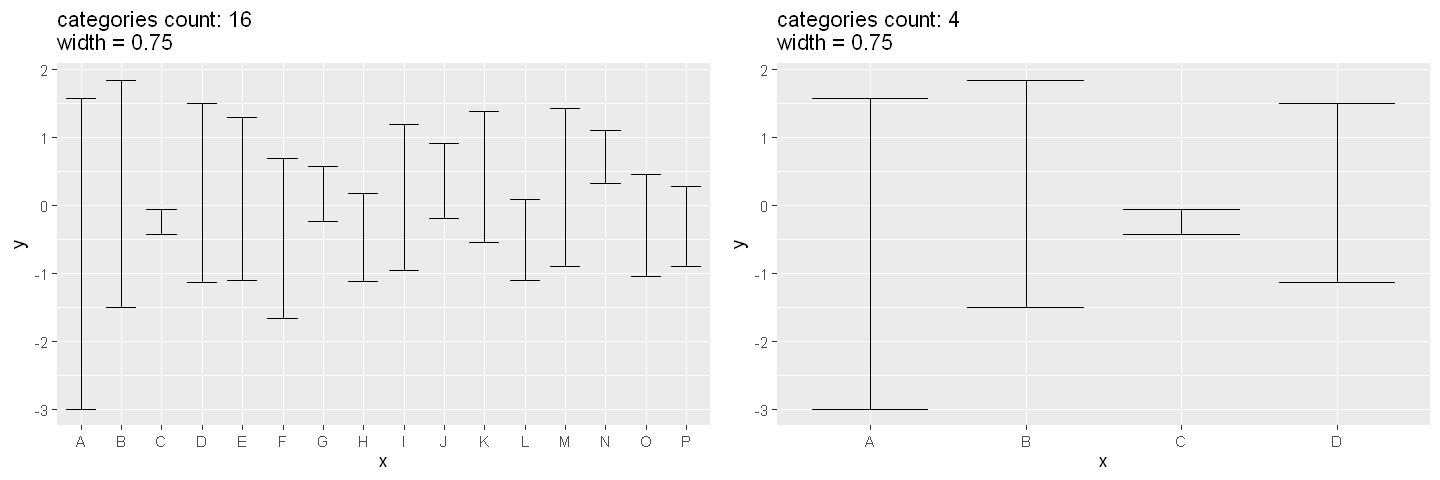

In [5]:
get_errorbar_plot <- function (df, width) {
    title = sprintf('categories count: %s\nwidth = %s', length(unique(df$x)), width) 
    ggplot(df, aes(x, y)) +
        geom_errorbar(stat = 'boxplot', width = width) +
        ggtitle(title)
}

plot_grid(
    get_errorbar_plot(errorbar_df, .75),
    get_errorbar_plot(errorbar_subdf, .75)
)

## Actual examples with `unit()`

Warning message in geom_segment(aes(x = 2, y = 15, xend = 2, yend = 25), arrow = arrow(length = unit(1, :
"All aesthetics have length 1, but the data has 32 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row."


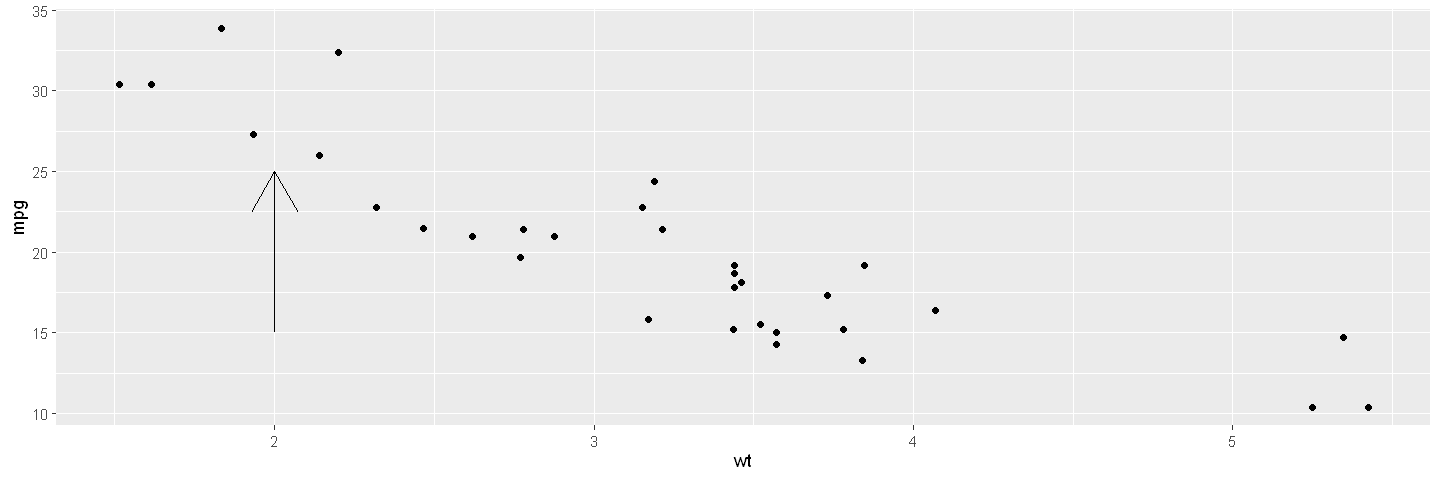

In [6]:
ggplot(mtcars, aes(x = wt, y = mpg)) + geom_point() + geom_segment(
    aes(x = 2, y = 15, xend = 2, yend = 25),
    arrow = arrow(length = unit(1, "cm"))
)

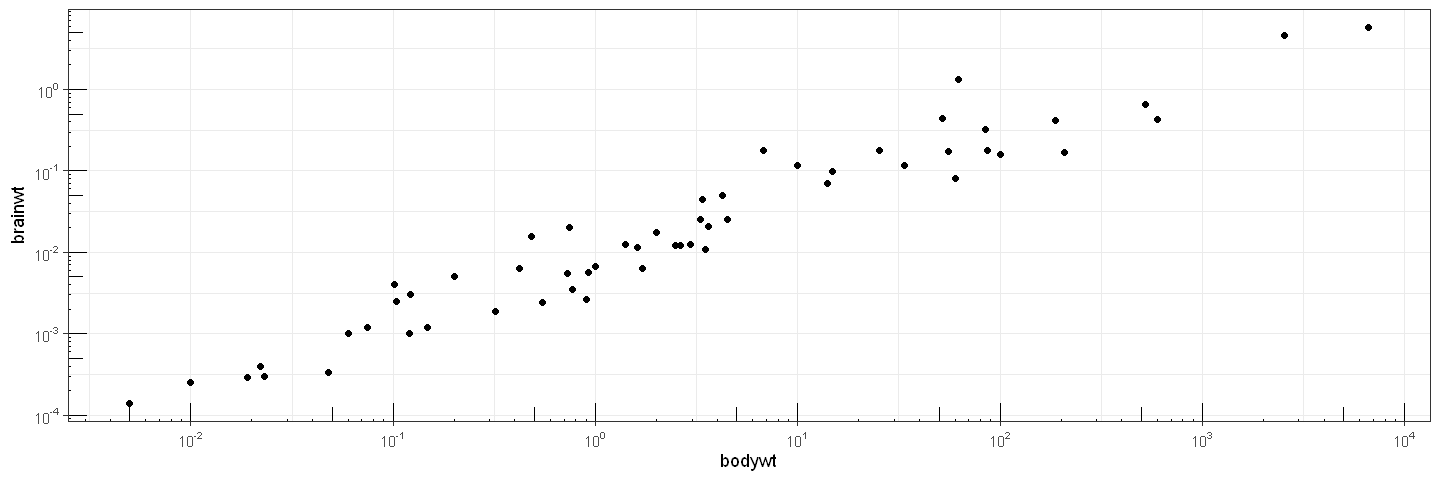

In [7]:
ggplot(msleep, aes(bodywt, brainwt)) +
geom_point(na.rm = TRUE) +
scale_x_log10(
breaks = scales::trans_breaks("log10", function(x) 10^x),
labels = scales::trans_format("log10", scales::math_format(10^.x))
) +
scale_y_log10(
breaks = scales::trans_breaks("log10", function(x) 10^x),
labels = scales::trans_format("log10", scales::math_format(10^.x))
) +
theme_bw() +
annotation_logticks(
short = unit(.5,"mm"),
mid = unit(3,"mm"),
long = unit(4,"mm")
)

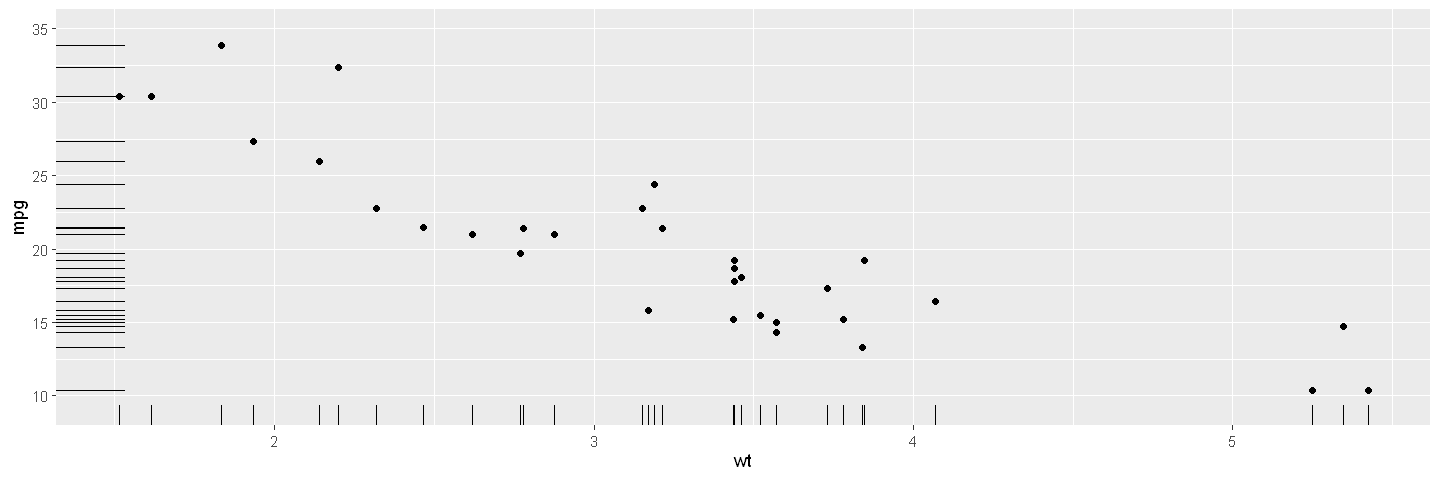

In [8]:
ggplot(mtcars, aes(wt, mpg)) +
geom_point() +
geom_rug(length = unit(0.05, "npc")) +
scale_y_continuous(expand = c(0.1, 0.1))

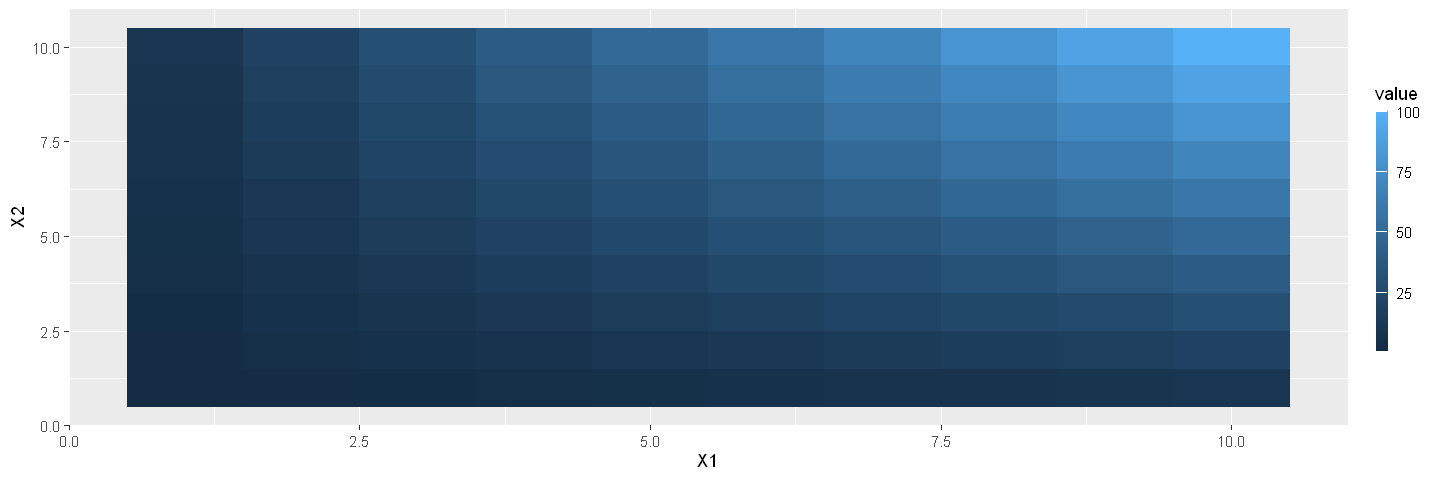

In [9]:
df <- expand.grid(X1 = 1:10, X2 = 1:10)
df$value <- df$X1 * df$X2
ggplot(df, aes(X1, X2)) + geom_tile(aes(fill = value)) +
guides(fill = guide_colourbar(theme = theme(
legend.key.width = unit(0.5, "lines"),
legend.key.height = unit(10, "lines")
)))

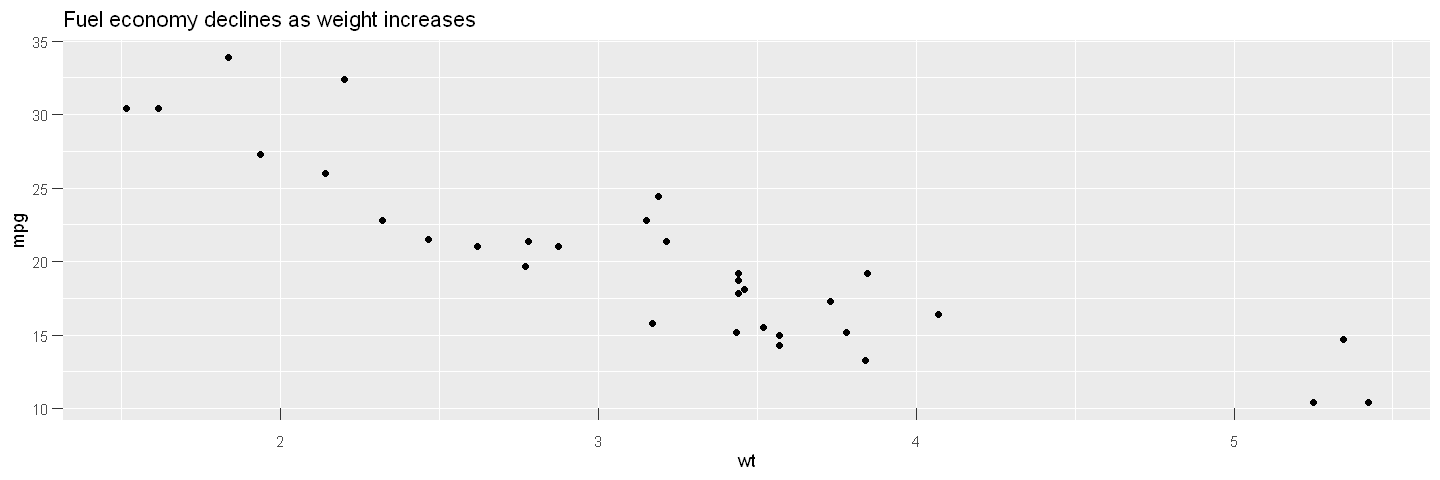

In [10]:
ggplot(mtcars, aes(wt, mpg)) +
geom_point() +
labs(title = "Fuel economy declines as weight increases") +
theme(
axis.ticks.length.y = unit(.25, "cm"),
axis.ticks.length.x = unit(-.25, "cm"),
axis.text.x = element_text(margin = margin(t = .3, unit = "cm"))
)